delete all .db files in the current folder

In [2]:
import os
import glob

for db_file in glob.glob("*.db"):
  os.remove(db_file)

# sqlite3

In [3]:
import sqlite3

# 01-02

In [4]:
conn = sqlite3.connect('01-02.db')
c = conn.cursor()

In [5]:
# Create table Instructors
c.execute('''CREATE TABLE Instructors (
    Instructor_ID INTEGER PRIMARY KEY,
    Instructor_Name TEXT,
    Department_Name TEXT
)''')

In [6]:
# Insert data into Instructors table
data = [
    (101, "Amit Dubey", "Physics"),
    (102, "Sarthak Gaur", "English"),
    (103, "Neha Sharma", "English"),
    (104, "Sumit Kumar", "Chemistry"),
    (105, "Himanshi Mehra", "Mathematics")
]
c.executemany("INSERT INTO Instructors VALUES (?, ?, ?)", data)
conn.commit()

In [7]:
# Create table Departments
c.execute('''CREATE TABLE Departments (
    Department_Name TEXT PRIMARY KEY,
    Building_Name TEXT
)''')

In [8]:
# Insert data into Departments table
data = [
    ("English", "B1"),
    ("Mathematics", "B2"),
    ("Physics", "B3"),
    ("Chemistry", "B2"),
    ("Finance", "B5")
]
c.executemany("INSERT INTO Departments VALUES (?, ?)", data)
conn.commit()

In [9]:
# Fetch instructor names from English department or those in buildings B1 or B2
c.execute('''SELECT Instructor_Name
FROM Instructors i
JOIN Departments d ON d.Department_Name = i.Department_Name
WHERE (i.Department_Name = 'English' OR d.Building_Name IN ("B1", "B2"))''')

result = c.fetchall()
print(result)

[('Sarthak Gaur',), ('Neha Sharma',), ('Sumit Kumar',), ('Himanshi Mehra',)]


In [10]:
# Fetch instructor names from English department located in building B1
c.execute('''SELECT Instructor_Name
FROM Instructors i
INNER JOIN Departments d ON i.Department_Name = d.Department_Name
WHERE d.Building_Name = "B1"''')

result = c.fetchall()
print(result)

[('Sarthak Gaur',), ('Neha Sharma',)]


In [11]:
conn.close()

# 03

In [12]:
conn = sqlite3.connect('03.db')
c = conn.cursor()

In [13]:
# Create the table without a primary key
c.execute('''CREATE TABLE friends (
    name TEXT
)''')

In [14]:
# Insert data
data = [("vidu",), ("rahul",), ("muskan",), ("cmd",), ("harikesh",), ("harikesh",)]
c.executemany("INSERT INTO friends (name) VALUES (?)", data)
conn.commit()

In [15]:
# Print the table contents
c.execute("SELECT * FROM friends")
result = c.fetchall()
print(result)

[('vidu',), ('rahul',), ('muskan',), ('cmd',), ('harikesh',), ('harikesh',)]


In [16]:
conn.close()

# 04

In [17]:
conn = sqlite3.connect('04.db')
c = conn.cursor()

In [18]:
# Create table Employee
c.execute('''CREATE TABLE Employee (
    Employee_ID INTEGER PRIMARY KEY,
    Employee_Name TEXT,
    Age INTEGER,
    PhoneNo TEXT
)''')

In [19]:
# Insert data into Employee table
data = [
    (1, "Saurav Lokesh", 23, "9871768118"),
    (2, "Garima Das", 25, "9987712611"),
    (3, "Swaroop Kumar", 21, "9863674830"),
    (4, "Sumita Verma", 25, "9872618731")
]
c.executemany("INSERT INTO Employee VALUES (?, ?, ?, ?)", data)
conn.commit()

In [20]:
# Create table Project
c.execute('''CREATE TABLE Project (
    Project_ID INTEGER PRIMARY KEY,
    Employee_ID INTEGER,
    Client_ID INTEGER,
    Project_Name TEXT
)''')

In [21]:
# Insert data into Project table
data = [
    (101, 1, 4, "Project1"),
    (102, 2, 8, "Project2"),
    (103, 3, 3, "Project3"),
    (104, 4, 7, "Project4")
]
c.executemany("INSERT INTO Project VALUES (?, ?, ?, ?)", data)
conn.commit()

In [22]:
# Fetch project names, IDs, and employee names from Employee and Project tables
c.execute('''SELECT Project.Project_Name,
Project.Project_ID, Employee.Employee_Name
FROM Employee
INNER JOIN Project
ON Employee.Employee_ID=Project.Employee_ID;''')

result = c.fetchall()
print(result)

[('Project1', 101, 'Saurav Lokesh'), ('Project2', 102, 'Garima Das'), ('Project3', 103, 'Swaroop Kumar'), ('Project4', 104, 'Sumita Verma')]


In [23]:
conn.close()

# 05-07

In [24]:
conn = sqlite3.connect('05.db')
c = conn.cursor()

In [25]:
# Create the players table
c.execute('''CREATE TABLE players (
    player_id INTEGER PRIMARY KEY,
    country TEXT,
    name TEXT,
    role TEXT
)''')

In [26]:
# Insert data into players table
data = [
    (1, "India", "Rohit Sharma", "opening_batsman"),
    (2, "India", "Virat Kohli", "middle_order_batsman"),
    (3, "South Africa", "AB de Villiers", "middle_order_batsman"),
    (4, "Australia", "Steven Smith", "middle_order_batsman"),
    (5, "Australia", "David Warner", "opening_batsman")
]
c.executemany("INSERT INTO players VALUES (?, ?, ?, ?)", data)
conn.commit()

In [27]:
# Create the records table
c.execute('''CREATE TABLE records (
    record_id INTEGER PRIMARY KEY,
    matches INTEGER,
    runs INTEGER,
    highest_score INTEGER,
    format TEXT,
    average REAL,
    player_id INTEGER
)''')

In [28]:
# Insert data into records table
data = [
    (1, 39, 2679, 212, "test", 46.19, 1),
    (2, 227, 9206, 264, "odi", 48.96, 1),
    (3, 227, 7547, 254, "odi", 52.05, 2),
    (4, 254, 12169, 183, "test", 59.07, 2),
    (5, 114, 8765, 278, "test", 50.66, 3),
    (6, 228, 9577, 176, "odi", 53.55, 3),
    (7, 77, 7540, 239, "test", 61.8, 4),
    (8, 128, 4378, 164, "odi", 43.35, 4),
    (9, 86, 7311, 335, "test", 48.1, 5),
    (10, 128, 5455, 179, "odi", 45.08, 5)
]
c.executemany("INSERT INTO records VALUES (?, ?, ?, ?, ?, ?, ?)", data)
conn.commit()

In [29]:
# Fetch country with the highest total runs
c.execute('''SELECT players.country
FROM players
INNER JOIN records ON records.player_id = players.player_id
GROUP BY country
ORDER BY SUM(records.runs) DESC
LIMIT 1;''')

result = c.fetchall()
print(result)

[('India',)]


In [30]:
# Fetch name of the opening batsman with the highest ODI score
c.execute('''SELECT players.name
FROM players
INNER JOIN records ON records.player_id = players.player_id
WHERE players.role = "opening_batsman" and records.format = "odi"
ORDER BY records.highest_score DESC
LIMIT 1;''')

result = c.fetchall()
print(result)

[('Rohit Sharma',)]


## 07

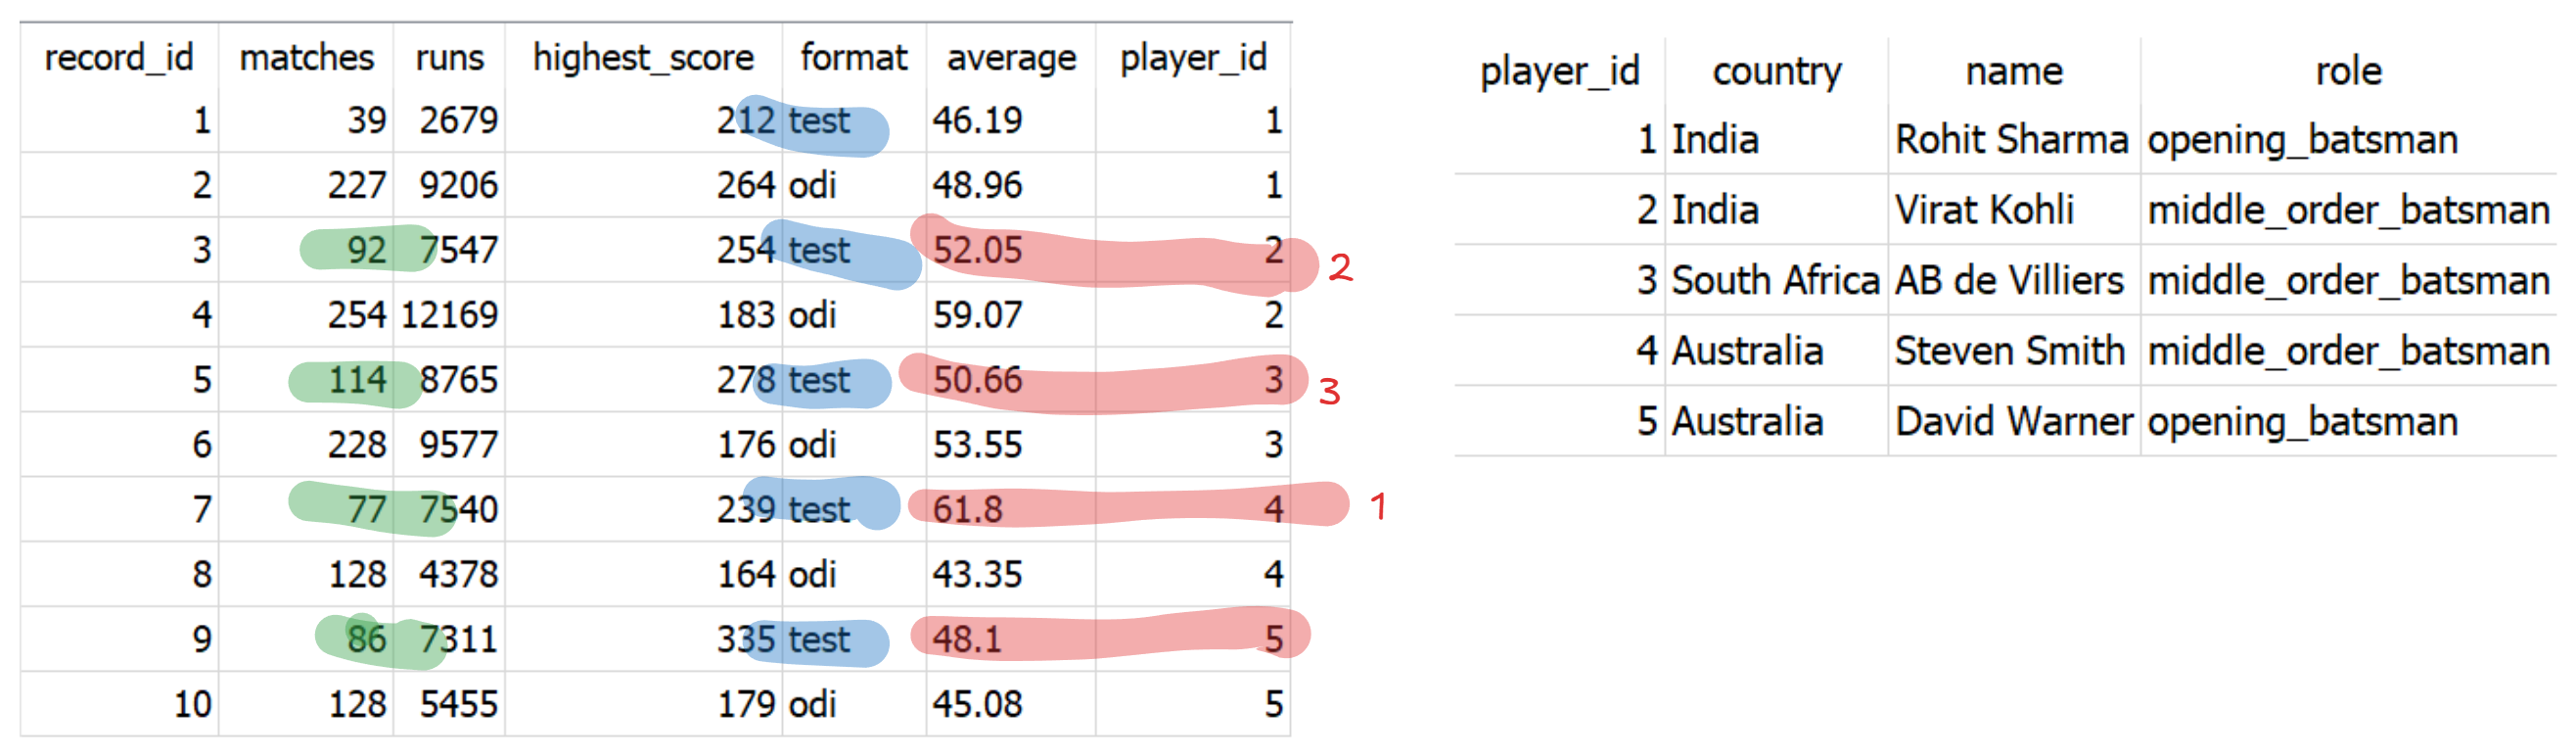

In [31]:
# Fetch top 3 players with more than 75 test matches, ordered by average
c.execute('''SELECT players.name
FROM players
INNER JOIN records ON records.player_id = players.player_id
WHERE records.matches > 75 and records.format = "test"
ORDER BY records.average DESC
LIMIT 3;''')

result = c.fetchall()
print(result)

[('Steven Smith',), ('Virat Kohli',), ('AB de Villiers',)]


In [32]:
conn.close()